In [1]:
import pandas as pd

In [2]:
import chardet

with open('stores_sales_forecasting.csv', 'rb') as f:
    result = chardet.detect(f.read())


In [14]:
encoding = result['encoding']
df = pd.read_csv('stores_sales_forecasting.csv', encoding=encoding)

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [16]:
df = df[['Order Date','Sub-Category','Region','City','Quantity','Discount','Sales']]

In [17]:
df.head()

,Order Date,Sub-Category,Region,City,Quantity,Discount,Sales
0,11/8/2016,Bookcases,South,Henderson,2,0.00,261.9600
1,11/8/2016,Chairs,South,Henderson,3,0.00,731.9400
2,10/11/2015,Tables,South,Fort Lauderdale,5,0.45,957.5775
3,6/9/2014,Furnishings,West,Los Angeles,7,0.00,48.8600
4,6/9/2014,Tables,West,Los Angeles,9,0.20,1706.1840


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    2121 non-null   object 
 1   Sub-Category  2121 non-null   object 
 2   Region        2121 non-null   object 
 3   City          2121 non-null   object 
 4   Quantity      2121 non-null   int64  
 5   Discount      2121 non-null   float64
 6   Sales         2121 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 116.1+ KB


In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2121 non-null   datetime64[ns]
 1   Sub-Category  2121 non-null   object        
 2   Region        2121 non-null   object        
 3   City          2121 non-null   object        
 4   Quantity      2121 non-null   int64         
 5   Discount      2121 non-null   float64       
 6   Sales         2121 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 116.1+ KB


In [21]:
df['Order Date'].dt.year

0       2016
1       2016
2       2015
3       2014
4       2014
        ... 
2116    2015
2117    2016
2118    2015
2119    2014
2120    2017
Name: Order Date, Length: 2121, dtype: int64

In [22]:
# month and year fetching

df['Month']  = df['Order Date'].dt.month
df['Year']  = df['Order Date'].dt.year


In [24]:
df_copy = df.copy()
month_df = df.copy()   # this is for monthly sales we are making this df

In [887]:
df.drop('Order Date',axis=1,inplace=True)

In [888]:
df.head()

,Sub-Category,Region,City,Quantity,Discount,Sales,Month,Year
0,Bookcases,South,Henderson,2,0.00,261.9600,11,2016
1,Chairs,South,Henderson,3,0.00,731.9400,11,2016
2,Tables,South,Fort Lauderdale,5,0.45,957.5775,10,2015
3,Furnishings,West,Los Angeles,7,0.00,48.8600,6,2014
4,Tables,West,Los Angeles,9,0.20,1706.1840,6,2014


In [889]:
df['Year'].value_counts()

2017    686
2016    562
2015    452
2014    421
Name: Year, dtype: int64

In [890]:
df.groupby(['Year','Month'])['Sales'].sum()

Year  Month
2014  1         6242.5250
      2         1839.6580
      3        14573.9560
      4         7944.8370
      5         6912.7870
      6        13206.1256
      7        10821.0510
      8         7320.3465
      9        23816.4808
      10       12304.2470
      11       21564.8727
      12       30645.9665
2015  1        11739.9416
      2         3134.3740
      3        12499.7830
      4        10475.6985
      5         9374.9505
      6         7714.1790
      7        13674.4200
      8         9638.5922
      9        26273.0230
      10       12026.6235
      11       30880.8325
      12       23085.8192
2016  1         7622.7430
      2         3925.5510
      3        12801.0920
      4        13212.0900
      5        15119.8350
      6        13070.5720
      7        13068.5190
      8        12483.2323
      9        27262.8809
      10       11872.5770
      11       31783.6288
      12       36678.7150
2017  1         5964.0320
      2         6866.3374


In [891]:
# finding sales on each month of each year 

sales_data = df.groupby(['Year','Month'])['Sales'].sum().reset_index()

In [909]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [893]:
df['City'].value_counts().head(10)

New York City    192
Los Angeles      154
Philadelphia     111
San Francisco    102
Seattle           97
Houston           81
Chicago           68
Columbus          48
San Diego         46
Detroit           28
Name: City, dtype: int64

# Techniques to Increase model performance

--------------------------------------------------------------------------------------------------------------------------

- Too many columns(382) that is why the accuracy is too low and cause overfitting

**This is now solved by reducing the city columns from 382 to 22 and increase accuracy from 51-64**

- Now we Scale the data for imporoving the model performance again

**I scalled the Quantity column but it not increase the R2 score**

- Now i checked that out mean of sales columns is 349 and median is 182 this show there is an outlier we have to correct it

**When i replaced the outliers with the middle or medain value then it reduce the accuracy again from 63 - 53 both on train and 
test**

- Now we try to apply other algorithm to imporve this accuray

---------------------------------------------------------------------------------------------------------------------

# Because of this mapping we increase the R 2 score 51 to 63


* Try it by commenting out this one 
* Because it reduce the columns from 382 to 22

In [894]:
df['City'] = df['City'].map({'New York City':'New York City','Los Angeles':'Los Angeles','Philadelphia':'Philadelphia','San Francisco':
                'San Francisco','Seattle':'Seattle','Houston':'Houston','Chicago':'Chicago','Columbus':'Columbus','San Diego':
                'San Diego','Detroit':'Detroit'}).fillna('Other')

In [895]:
df['City'].value_counts()

Other            1194
New York City     192
Los Angeles       154
Philadelphia      111
San Francisco     102
Seattle            97
Houston            81
Chicago            68
Columbus           48
San Diego          46
Detroit            28
Name: City, dtype: int64

# Scalling Year column

In [896]:
# df['Year'] = df['Year'].map({2014:4,2015:5,2016:6,2017:7})

In [897]:
# df['Year'].value_counts()

# Outlier Handling in Sales Columns

In [898]:
# this technique reduce the accuracy again that's why we comment it out
"""
q1 = df['Sales'].quantile(.25)
q3 = df['Sales'].quantile(.75)

iqr = q3-q1

Lower_limit = q1-1.5 *iqr 

Upper_limit = q3+1.5 *iqr 

median  = df['Sales'].median()

df['Sales'] = df['Sales'].apply(lambda x: median if x<Lower_limit or x>Upper_limit else x)
"""


"\nq1 = df['Sales'].quantile(.25)\nq3 = df['Sales'].quantile(.75)\n\niqr = q3-q1\n\nLower_limit = q1-1.5 *iqr \n\nUpper_limit = q3+1.5 *iqr \n\nmedian  = df['Sales'].median()\n\ndf['Sales'] = df['Sales'].apply(lambda x: median if x<Lower_limit or x>Upper_limit else x)\n"

In [899]:
# # Encode categorical variables
# df = pd.get_dummies(df, columns=['Sub-Category', 'Region','City'], drop_first=True)

In [900]:
df

,Sub-Category,Region,City,Quantity,Discount,Sales,Month,Year
0,Bookcases,South,Other,2,0.00,261.9600,11,2016
1,Chairs,South,Other,3,0.00,731.9400,11,2016
2,Tables,South,Other,5,0.45,957.5775,10,2015
3,Furnishings,West,Los Angeles,7,0.00,48.8600,6,2014
4,Tables,West,Los Angeles,9,0.20,1706.1840,6,2014
...,...,...,...,...,...,...,...,...
2116,Bookcases,Central,Houston,4,0.32,383.4656,3,2015
2117,Furnishings,East,Other,1,0.00,13.4000,12,2016
2118,Tables,South,Other,1,0.00,85.9800,9,2015
2119,Furnishings,South,Other,3,0.20,25.2480,1,2014


In [902]:
# Define X (features) and y (target)
X = df.drop(['Sales'],axis=1)
y = np.log(df['Sales'])

In [903]:
X.head()

,Sub-Category,Region,City,Quantity,Discount,Month,Year
0,Bookcases,South,Other,2,0.00,11,2016
1,Chairs,South,Other,3,0.00,11,2016
2,Tables,South,Other,5,0.45,10,2015
3,Furnishings,West,Los Angeles,7,0.00,6,2014
4,Tables,West,Los Angeles,9,0.20,6,2014


# Scalling Features

In [904]:
# scaler = StandardScaler()
# X['Quantity'] = scaler.fit_transform(np.array(X['Quantity']).reshape(-1,1))


In [905]:
X

,Sub-Category,Region,City,Quantity,Discount,Month,Year
0,Bookcases,South,Other,2,0.00,11,2016
1,Chairs,South,Other,3,0.00,11,2016
2,Tables,South,Other,5,0.45,10,2015
3,Furnishings,West,Los Angeles,7,0.00,6,2014
4,Tables,West,Los Angeles,9,0.20,6,2014
...,...,...,...,...,...,...,...
2116,Bookcases,Central,Houston,4,0.32,3,2015
2117,Furnishings,East,Other,1,0.00,12,2016
2118,Tables,South,Other,1,0.00,9,2015
2119,Furnishings,South,Other,3,0.20,1,2014


In [906]:

# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Pipeline for training and and testing

In [935]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


# Evaluate the modelon Test Data

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Mean Absolute Error: 0.71
Mean Squared Error: 0.81
R-squared Score: 0.63


In [23]:
month_df

NameError: name 'month_df' is not defined

### Other Algorithms for accuracy

In [923]:
from sklearn.tree import DecisionTreeRegressor

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDecision Tree Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Decision Tree Regression Performance:
Mean Absolute Error: 1.00
Mean Squared Error: 1.66
R-squared Score: 0.25


In [924]:
from sklearn.ensemble import RandomForestRegressor

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Random Forest Regression Performance:
Mean Absolute Error: 0.76
Mean Squared Error: 0.94
R-squared Score: 0.57


In [925]:
from sklearn.ensemble import GradientBoostingRegressor

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Gradient Boosting Regression Performance:
Mean Absolute Error: 0.71
Mean Squared Error: 0.80
R-squared Score: 0.64


In [926]:
from sklearn.svm import SVR

step2 = SVR()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSupport Vector Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Support Vector Regression Performance:
Mean Absolute Error: 1.23
Mean Squared Error: 2.32
R-squared Score: -0.05


----------------------------------Other Algorithms till here-------------

## -------------------------------------------------------------------------------

# Forecasting future Data

In [936]:
future_data = pd.DataFrame({
    "Sub-Category": ["Binders", "Chairs"],
    "City":['Los Angeles','Columbus'],
    "Region": ["West", "East"],
    "Quantity": [3, 4],  
    "Discount": [0.1, 0.2],
    "Month": [8, 9],  # Future months
    "Year": [2025, 2025]  # Future year
})

In [938]:
np.exp(pipe.predict(future_data))

C:\Users\PMYLS\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([258.16731519, 280.72057077])

In [943]:
df.sample()

,Sub-Category,Region,City,Quantity,Discount,Sales,Month,Year
37,Chairs,Central,Other,9,0.3,1740.06,9,2014


In [946]:
new_data=[['Chairs','Central','Other','9','0.3','9','2014']]

In [947]:
np.exp(pipe.predict(new_data))

C:\Users\PMYLS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([1084.85944863])

## ---------------------------------------------------------------------------

In [911]:
y_train_pred = pipe.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.70
Mean Squared Error: 0.78
R-squared Score: 0.65


In [917]:
X_train.sample()

,Sub-Category,Region,City,Quantity,Discount,Month,Year
1811,Furnishings,East,Other,1,0.0,12,2017


In [919]:
np.exp(pipe.predict([['Furnishings','East','Other',6,0.2,9,2016]]))

C:\Users\PMYLS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([78.91904719])

## Other Models 

In [625]:
X.shape

(2121, 20)

In [626]:
y.shape

(2121,)

In [627]:
y_train.shape

(1696,)

In [629]:
X_train.shape

(1696, 20)

In [635]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Adjust degree based on performance
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Apply the same transformation to test data

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test data (use transformed X_test)
y_pred = model.predict(X_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.70
Mean Squared Error: 0.78
R-squared Score: 0.65


In [488]:
df['Quantity'].max()

14

In [489]:
len(model.coef_)

20

In [490]:
model.coef_

array([ 0.54097509, -1.27298157, -0.00222377, -0.00550855,  0.03131885,
       -2.02166695,  0.35552968,  0.03687268, -0.08460831, -0.00484618,
       -0.03537741,  0.08412872,  0.07942145,  0.0647035 ,  0.18568949,
        0.21846024,  0.27612241,  0.21616733,  0.07727466,  0.08839566])

In [491]:
model.intercept_

5.910117697667522

In [492]:
df.shape

(2121, 22)

In [377]:
len(df.columns)

22

### Reason of low Accuracy

In [496]:
df['Sales'].min(),df['Sales'].max(),df['Sales'].mean(),df['Sales'].median()


(1.892, 4416.174, 349.83488698727007, 182.22)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order Date                2121 non-null   datetime64[ns]
 1   Quantity                  2121 non-null   int64         
 2   Discount                  2121 non-null   float64       
 3   Sales                     2121 non-null   float64       
 4   Month                     2121 non-null   int64         
 5   Year                      2121 non-null   int64         
 6   Sub-Category_Chairs       2121 non-null   uint8         
 7   Sub-Category_Furnishings  2121 non-null   uint8         
 8   Sub-Category_Tables       2121 non-null   uint8         
 9   Region_East               2121 non-null   uint8         
 10  Region_South              2121 non-null   uint8         
 11  Region_West               2121 non-null   uint8         
 12  City_Columbus       

In [328]:
df

,Order Date,Quantity,Discount,Sales,Month,Year,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_East,...,City_Columbus,City_Detroit,City_Houston,City_Los Angeles,City_New York City,City_Other,City_Philadelphia,City_San Diego,City_San Francisco,City_Seattle
0,2016-11-08,2,0.00,261.9600,11,2016,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-08,3,0.00,731.9400,11,2016,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2015-10-11,5,0.45,957.5775,10,2015,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2014-06-09,7,0.00,48.8600,6,2014,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014-06-09,9,0.20,1706.1840,6,2014,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2015-03-19,4,0.32,383.4656,3,2015,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2117,2016-12-05,1,0.00,13.4000,12,2016,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2118,2015-09-06,1,0.00,85.9800,9,2015,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2119,2014-01-21,3,0.20,25.2480,1,2014,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='Sales', ylabel='Density'>

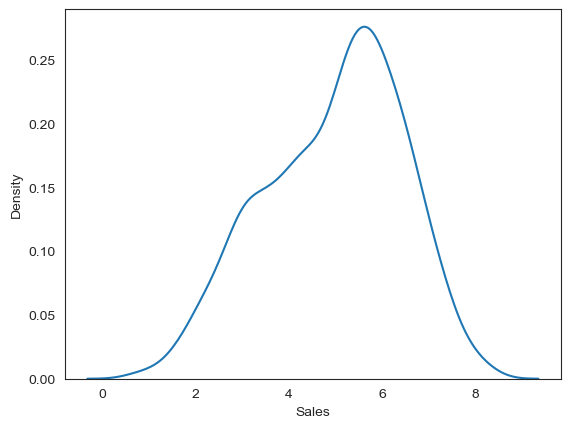

In [504]:
sns.kdeplot(np.log((df['Sales'])))

<AxesSubplot:xlabel='Sales', ylabel='Density'>

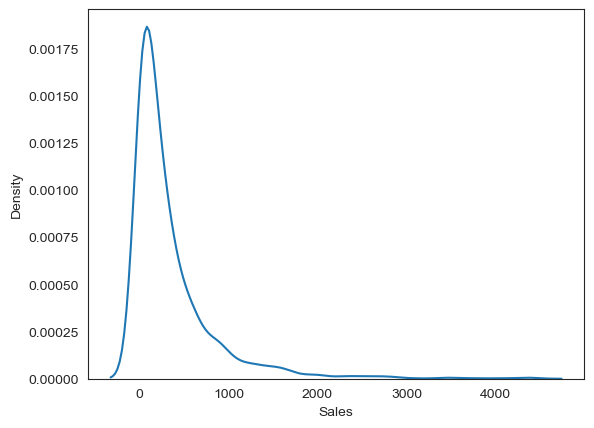

In [511]:
sns.kdeplot(df['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

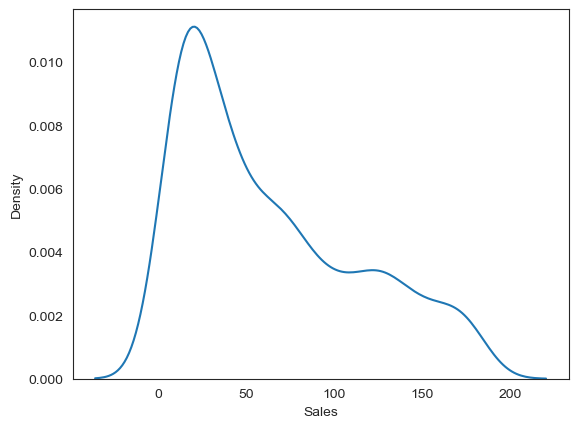

In [509]:
sns.kdeplot(df[df['Sales']<183]['Sales'])

In [513]:
df['Sales'].describe()

count    2121.000000
mean      349.834887
std       503.179145
min         1.892000
25%        47.040000
50%       182.220000
75%       435.168000
max      4416.174000
Name: Sales, dtype: float64

In [514]:
df[df['Sales']<183]

,Order Date,Quantity,Discount,Sales,Month,Year,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_East,...,City_Columbus,City_Detroit,City_Houston,City_Los Angeles,City_New York City,City_Other,City_Philadelphia,City_San Diego,City_San Francisco,City_Seattle
3,2014-06-09,7,0.0,48.860,6,4,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,2017-07-16,2,0.3,71.372,7,7,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,2015-09-17,3,0.2,124.200,9,5,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
12,2015-04-18,2,0.0,6.160,4,5,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13,2015-04-18,1,0.0,89.990,4,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2016-12-12,5,0.0,60.350,12,6,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2117,2016-12-05,1,0.0,13.400,12,6,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2118,2015-09-06,1,0.0,85.980,9,5,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2119,2014-01-21,3,0.2,25.248,1,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [518]:
d = pd.DataFrame({'sales':[-203,5,6,20,40,64,199]})

In [519]:
d

,sales
0,-203
1,5
2,6
3,20
4,40
5,64
6,199


In [520]:
q1 = d['sales'].quantile(.25)
q3 = d['sales'].quantile(.75)

iqr = q3-q1

lower_limit = q1-1.5 *iqr 

upper_limit = q3+1.5 *iqr 

med  = d['sales'].median()

d['sales'].apply(lambda x: med if x<lower_limit or x>upper_limit else x)


0    20.0
1     5.0
2     6.0
3    20.0
4    40.0
5    64.0
6    20.0
Name: sales, dtype: float64

In [27]:
month_df = month_df.set_index('Order Date')

In [28]:
month_df

,Sub-Category,Region,City,Quantity,Discount,Sales,Month,Year
Order Date,,,,,,,,
2016-11-08,Bookcases,South,Henderson,2,0.00,261.9600,11,2016
2016-11-08,Chairs,South,Henderson,3,0.00,731.9400,11,2016
2015-10-11,Tables,South,Fort Lauderdale,5,0.45,957.5775,10,2015
2014-06-09,Furnishings,West,Los Angeles,7,0.00,48.8600,6,2014
2014-06-09,Tables,West,Los Angeles,9,0.20,1706.1840,6,2014
...,...,...,...,...,...,...,...,...
2015-03-19,Bookcases,Central,Houston,4,0.32,383.4656,3,2015
2016-12-05,Furnishings,East,Newark,1,0.00,13.4000,12,2016
2015-09-06,Tables,South,Lafayette,1,0.00,85.9800,9,2015


In [43]:
# Monthly Sales 

m_sales = month_df['Sales'].resample('M').sum()
m_sales

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

In [55]:
# Weekly Sales 

w_sales = month_df['Sales'].resample('W').sum()
w_sales

Order Date
2014-01-12     2712.4280
2014-01-19     1250.4730
2014-01-26     1655.9580
2014-02-02      623.6660
2014-02-09       14.5600
                 ...    
2017-12-03    16008.1720
2017-12-10     8794.4040
2017-12-17     4639.8190
2017-12-24     7274.0430
2017-12-31     4037.5648
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

In [38]:
# Daily Sales 

D_sales = month_df['Sales'].resample('D').sum()
D_sales

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-08       0.0000
2014-01-09       0.0000
2014-01-10      51.9400
                ...    
2017-12-26       0.0000
2017-12-27       0.0000
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Freq: D, Name: Sales, Length: 1455, dtype: float64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PMYLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Date'>

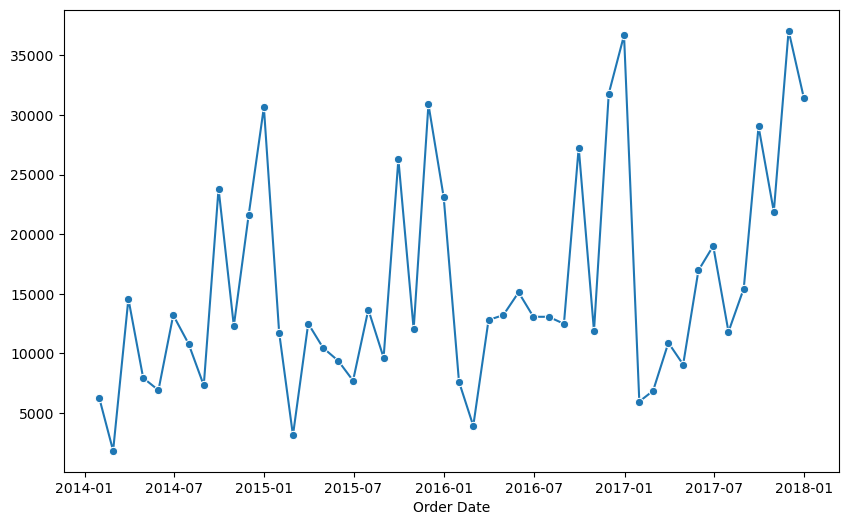

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(m_sales.index,m_sales.values,marker='o')


C:\Users\PMYLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Date'>

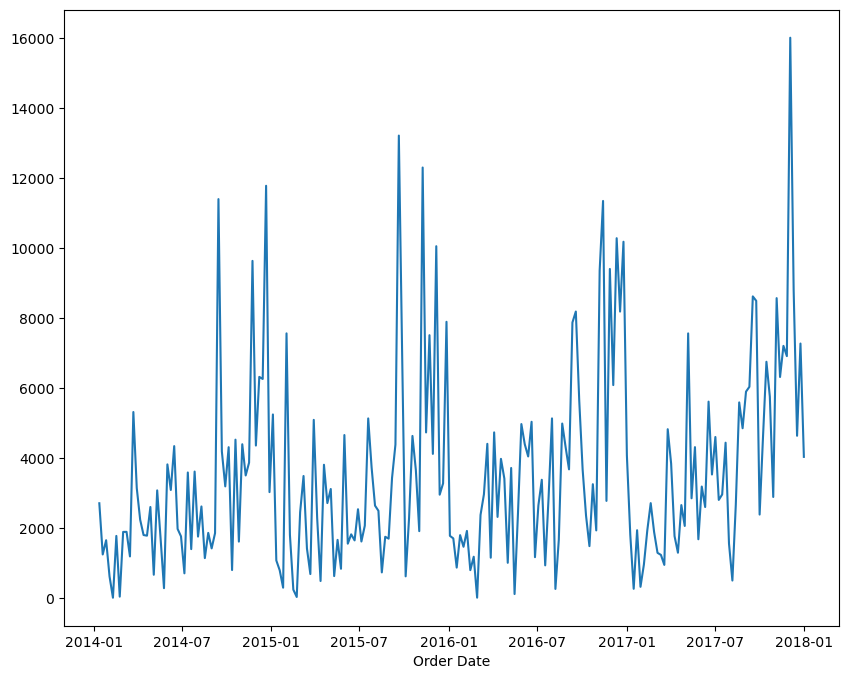

In [63]:
plt.figure(figsize=(10,8))
sns.lineplot(w_sales.index,w_sales.values)

In [66]:
df

,Order Date,Sub-Category,Region,City,Quantity,Discount,Sales,Month,Year
0,2016-11-08,Bookcases,South,Henderson,2,0.00,261.9600,11,2016
1,2016-11-08,Chairs,South,Henderson,3,0.00,731.9400,11,2016
2,2015-10-11,Tables,South,Fort Lauderdale,5,0.45,957.5775,10,2015
3,2014-06-09,Furnishings,West,Los Angeles,7,0.00,48.8600,6,2014
4,2014-06-09,Tables,West,Los Angeles,9,0.20,1706.1840,6,2014
...,...,...,...,...,...,...,...,...,...
2116,2015-03-19,Bookcases,Central,Houston,4,0.32,383.4656,3,2015
2117,2016-12-05,Furnishings,East,Newark,1,0.00,13.4000,12,2016
2118,2015-09-06,Tables,South,Lafayette,1,0.00,85.9800,9,2015
2119,2014-01-21,Furnishings,South,Miami,3,0.20,25.2480,1,2014


In [78]:

import chardet

with open('stores_sales_forecasting.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
encoding = result['encoding']
data = pd.read_csv('stores_sales_forecasting.csv', encoding=encoding)

In [79]:
data_df = data.set_index('Order Date')

In [80]:
data_df.sample()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
11/20/2016,3239,US-2016-127971,11/27/2016,Standard Class,DW-13195,David Wiener,Corporate,United States,Houston,Texas,77095,Central,FUR-CH-10003774,Furniture,Chairs,"Global Wood Trimmed Manager's Task Chair, Khaki",318.43,5,0.3,-77.333


In [87]:
sale_profit = data_df[['Sales','Profit']]
sale_profit

,Sales,Profit
Order Date,,
11/8/2016,261.9600,41.9136
11/8/2016,731.9400,219.5820
10/11/2015,957.5775,-383.0310
6/9/2014,48.8600,14.1694
6/9/2014,1706.1840,85.3092
...,...,...
3/19/2015,383.4656,-67.6704
12/5/2016,13.4000,6.4320
9/6/2015,85.9800,22.3548


# General Analysis

## Summary of all the Sales

In [99]:
new_df = df_copy.groupby(['Region','City','Year','Month','Category','Sub-Category'])['Sales'].sum().reset_index()

In [100]:
new_df

,Region,City,Year,Month,Category,Sub-Category,Sales
0,Central,Allen,2015,5,Furniture,Tables,244.0060
1,Central,Amarillo,2015,10,Furniture,Chairs,2453.4300
2,Central,Amarillo,2016,1,Furniture,Furnishings,23.0760
3,Central,Amarillo,2016,5,Furniture,Chairs,366.7440
4,Central,Amarillo,2017,3,Furniture,Bookcases,205.3328
...,...,...,...,...,...,...,...
1690,West,Vancouver,2017,10,Furniture,Furnishings,9.6400
1691,West,West Jordan,2015,11,Furniture,Furnishings,66.6900
1692,West,Westminster,2017,7,Furniture,Furnishings,295.5300
1693,West,Westminster,2017,8,Furniture,Chairs,207.1840


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

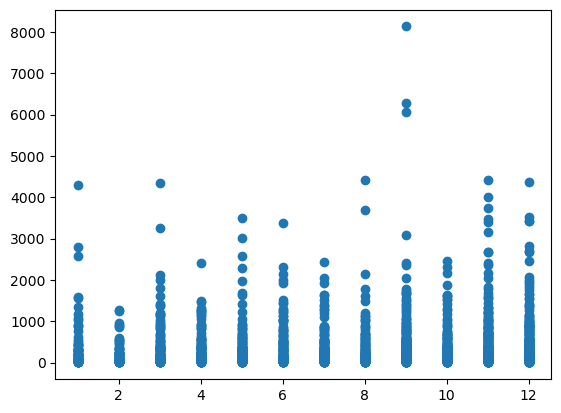

In [104]:
plt.scatter(new_df['Month'],new_df['Sales'])

In [117]:
new_df['Sales'].sort_values(ascending=False).head(10)

676     8129.205
622     6279.008
599     6056.469
779     4416.174
444     4404.900
1245    4375.536
1609    4353.170
914     4297.644
440     4007.840
628     3731.814
Name: Sales, dtype: float64

<BarContainer object of 1695 artists>

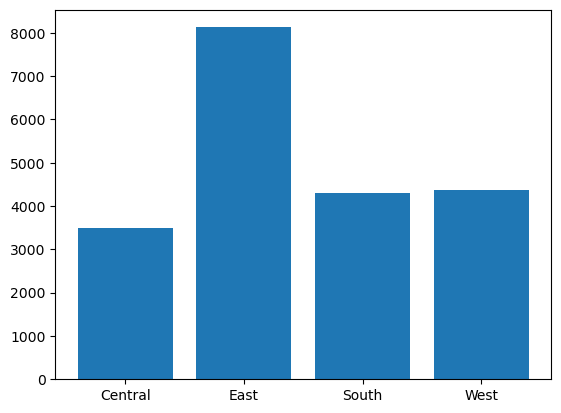

In [120]:
plt.bar(new_df['Region'], new_df['Sales'],)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

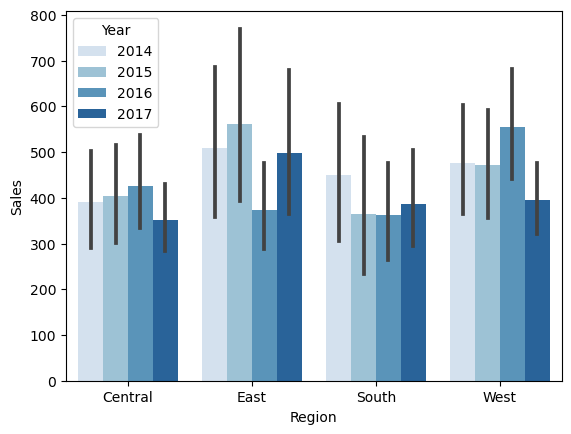

In [140]:
sns.barplot(data=new_df,x='Region',y='Sales',hue='Year',palette = "Blues",orient='v')

<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

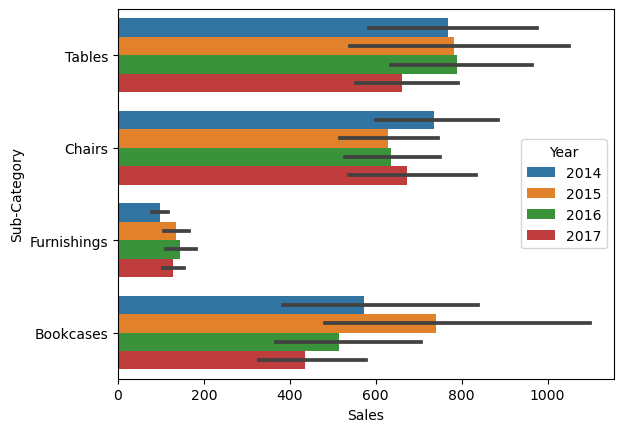

In [144]:
sns.barplot(data=new_df,x='Sales',y='Sub-Category',hue='Year',orient='h')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

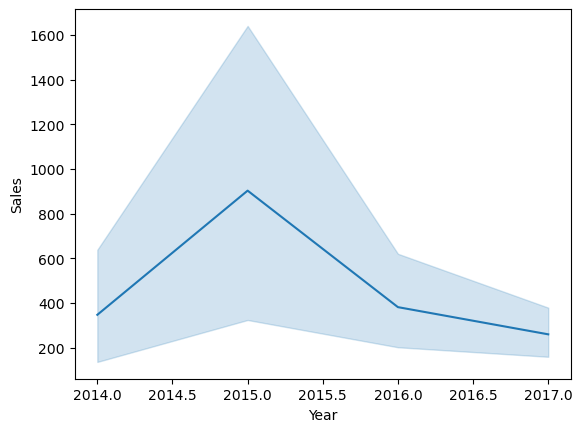

In [153]:
may_flights = new_df.query('Month == 1')
sns.lineplot(data=may_flights, x="Year", y="Sales")

<AxesSubplot:xlabel='Year', ylabel='Sales'>

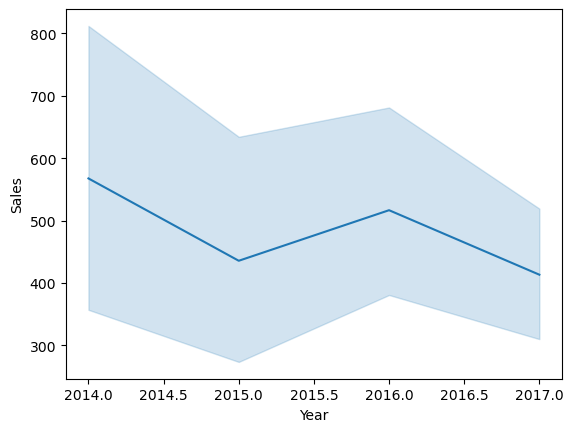

In [160]:
may_flights = new_df.query('Month == 12')
sns.lineplot(data=may_flights, x="Year", y="Sales")



<AxesSubplot:xlabel='Year', ylabel='Sales'>

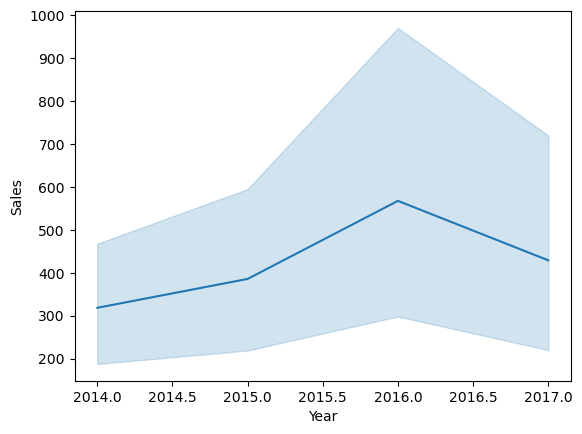

In [161]:
may_flights = new_df.query('Month == 8')
sns.lineplot(data=may_flights, x="Year", y="Sales")


In [194]:
sales_per_month = new_df.pivot_table(index='Year',columns='Month',values='Sa les').reset_index()

In [216]:
sales_per_month.set_index('Year')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,346.806944,262.808286,582.958240,378.325571,314.217591,489.115763,416.194269,318.275935,580.889776,424.284379,440.099443,567.517898
2015,903.072431,313.437400,543.468826,374.132089,347.220389,350.644500,441.110323,385.543688,547.354646,400.887450,506.243156,435.581494
2016,381.137150,230.914765,400.034125,455.589310,431.995286,484.095259,421.565129,567.419650,389.469727,282.680405,557.607523,516.601620
2017,259.305739,298.536409,351.401445,274.726003,385.399050,475.214668,274.721442,428.940944,537.559370,377.311521,544.951691,413.256142


<AxesSubplot:xlabel='Month'>

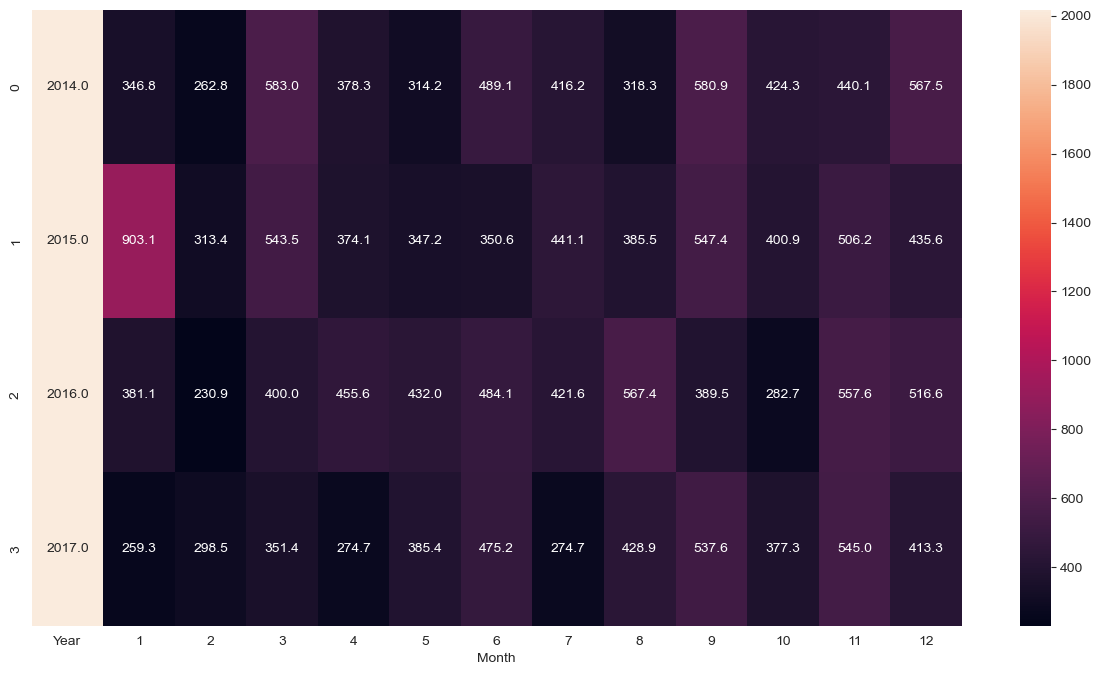

In [217]:
plt.figure(figsize=(15, 8))
sns.heatmap(sales_per_month,annot=True, fmt=".1f")

<AxesSubplot:xlabel='Month', ylabel='Sales'>

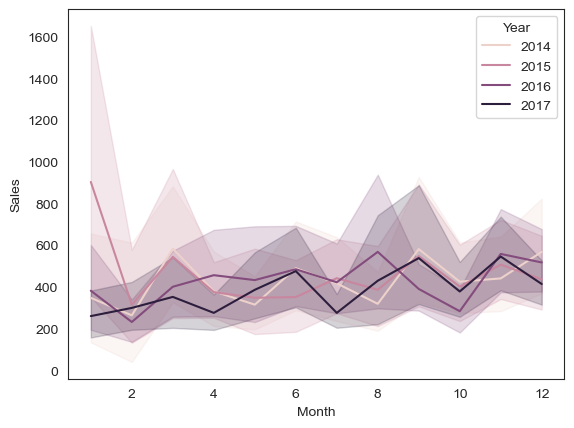

In [218]:
sns.set_style('white')
sns.lineplot(data = new_df,x='Month',y='Sales',hue='Year')

In [219]:
new_df

,Region,City,Year,Month,Category,Sub-Category,Sales
0,Central,Allen,2015,5,Furniture,Tables,244.0060
1,Central,Amarillo,2015,10,Furniture,Chairs,2453.4300
2,Central,Amarillo,2016,1,Furniture,Furnishings,23.0760
3,Central,Amarillo,2016,5,Furniture,Chairs,366.7440
4,Central,Amarillo,2017,3,Furniture,Bookcases,205.3328
...,...,...,...,...,...,...,...
1690,West,Vancouver,2017,10,Furniture,Furnishings,9.6400
1691,West,West Jordan,2015,11,Furniture,Furnishings,66.6900
1692,West,Westminster,2017,7,Furniture,Furnishings,295.5300
1693,West,Westminster,2017,8,Furniture,Chairs,207.1840


In [220]:
sales_per_month.columns

Index(['Year', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object', name='Month')